In [1]:
import os

import pandas as pd
import numpy as np

import librosa
import librosa.display

import IPython.display as ipd

import audioread
import soundfile as sf
import matplotlib.pyplot as plt

import random

%matplotlib inline

/home/oz/anaconda3/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/oz/anaconda3/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
BASE_DIR = 'train_audio/rooster/'

In [3]:
rooster_file_list = os.listdir(BASE_DIR)
print(rooster_file_list)
print(len(rooster_file_list))

['3-145382-A-1.wav', '4-164064-A-1.wav', '1-43382-A-1.wav', '4-164064-B-1.wav', '5-194930-B-1.wav', '1-27724-A-1.wav', '2-96460-A-1.wav', '1-44831-A-1.wav', '3-149189-A-1.wav', '2-95035-A-1.wav', '5-194930-A-1.wav', '2-71162-A-1.wav', '1-34119-A-1.wav', '4-164064-C-1.wav', '1-26806-A-1.wav', '4-164859-A-1.wav', '5-234879-B-1.wav', '5-200339-A-1.wav', '3-116135-A-1.wav', '4-208021-A-1.wav', '3-107219-A-1.wav', '1-40730-A-1.wav', '2-65750-A-1.wav', '3-137152-A-1.wav', '5-200334-A-1.wav', '3-134049-A-1.wav', '5-233160-A-1.wav', '3-163288-A-1.wav', '4-164021-A-1.wav', '1-34119-B-1.wav', '2-95258-A-1.wav', '2-81270-A-1.wav', '1-39923-A-1.wav', '2-100786-A-1.wav', '4-183487-A-1.wav', '2-95258-B-1.wav', '3-154957-A-1.wav', '4-170078-A-1.wav', '5-234879-A-1.wav', '5-200334-B-1.wav']
40


In [4]:
np.random.seed(100)

In [5]:
rooster_file = rooster_file_list[np.random.randint(len(rooster_file_list))]

In [6]:
rooster_file_path = os.path.join(BASE_DIR, rooster_file)

In [7]:
ipd.Audio(rooster_file_path)

In [8]:
y_list = []
sr_list = []

In [9]:
for filename in rooster_file_list:
    y, sr = sf.read(os.path.join(BASE_DIR,filename))
    y_list.append(y)
    sr_list.append(sr)

In [10]:
print(len(rooster_file_list),len(y_list), len(sr_list))
print("sr:", sr_list[0])

40 40 40
sr: 44100


y, sr = librosa.load(rooster_file)
print("y:", y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate(KHz):', sr, '\n')

In [11]:
i = np.random.randint(len(y_list))
j = np.random.randint(len(y_list))
if (i == j):
    print("indexes are equal, run again")

In [12]:
audio_task, _ = librosa.effects.trim(y_list[i])
audio_task2, _ = librosa.effects.trim(y_list[j])


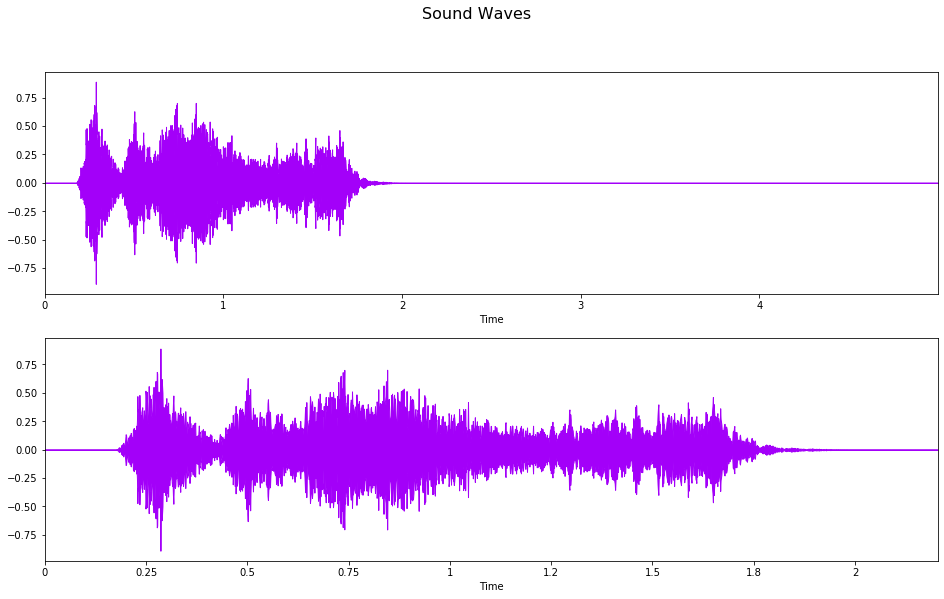

In [13]:
fig, ax = plt.subplots(2, figsize = (16, 9))
fig.suptitle('Sound Waves', fontsize=16)

librosa.display.waveplot(y = y_list[j], sr = sr_list[i], color = "#A300F9", ax=ax[0])
librosa.display.waveplot(y = audio_task2, sr = sr_list[j], color = "#A300F9", ax=ax[1])

In [14]:
ipd.Audio(os.path.join(BASE_DIR,rooster_file_list[i]))


In [15]:
ipd.Audio(os.path.join(BASE_DIR,rooster_file_list[j]))

In [16]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

In [17]:
# Short-time Fourier transform (STFT)
D_audio_task = np.abs(librosa.stft(audio_task, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D_audio_task))


Shape of D object: (1025, 287)


In [18]:
# Short-time Fourier transform (STFT)
D_audio_task2 = np.abs(librosa.stft(audio_task2, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D_audio_task2))


Shape of D object: (1025, 191)


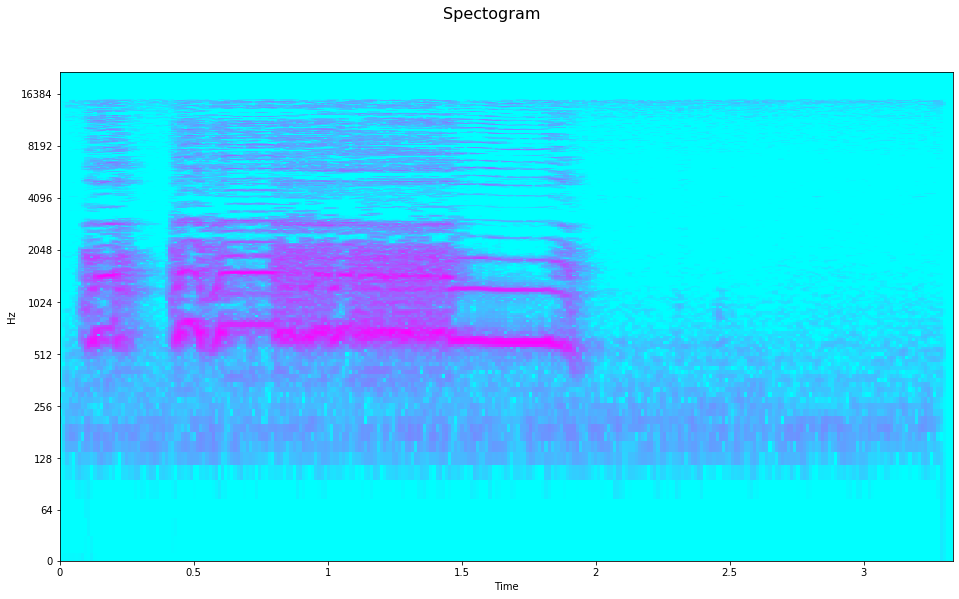

In [19]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.

DB_audio_task = librosa.amplitude_to_db(D_audio_task, ref = np.max)

# ==PLOT==

fig, ax = plt.subplots(1,1, figsize = (16, 9))
fig.suptitle('Spectogram', fontsize = 16)

librosa.display.specshow(DB_audio_task, sr= sr_list[i], hop_length=hop_length, x_axis='time', y_axis= 'log', cmap='cool')

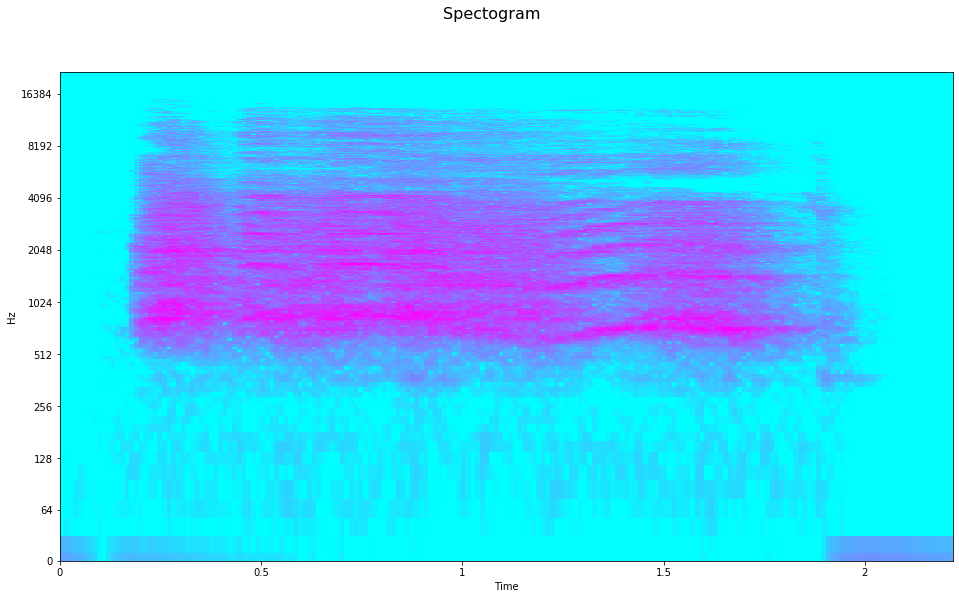

In [20]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.

DB_audio_task2 = librosa.amplitude_to_db(D_audio_task2, ref = np.max)

# ==PLOT==

fig, ax = plt.subplots(1,1, figsize = (16, 9))
fig.suptitle('Spectogram', fontsize = 16)

librosa.display.specshow(DB_audio_task2, sr= sr_list[j], hop_length=hop_length, x_axis='time', y_axis= 'log', cmap='cool')

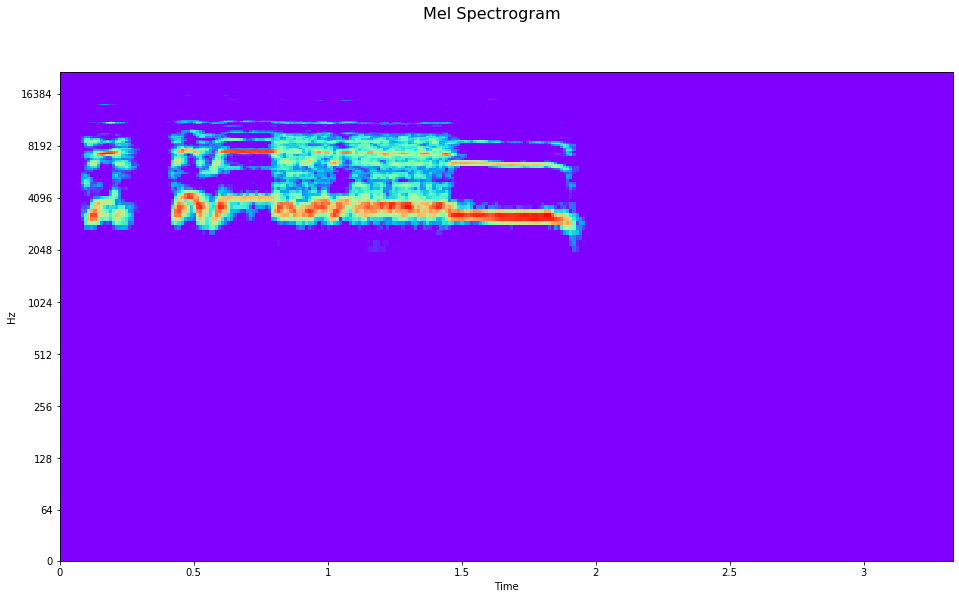

In [21]:
S_audio_task = librosa.feature.melspectrogram(audio_task, sr= sr_list[i])
S_DB_audio_task = librosa.amplitude_to_db(S_audio_task, ref = np.max)

# == PLOT ==

fig, ax = plt.subplots(1, 1, figsize = (16, 9))
fig.suptitle('Mel Spectrogram', fontsize = 16)

librosa.display.specshow(S_DB_audio_task, sr = sr_list[i], hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'rainbow')



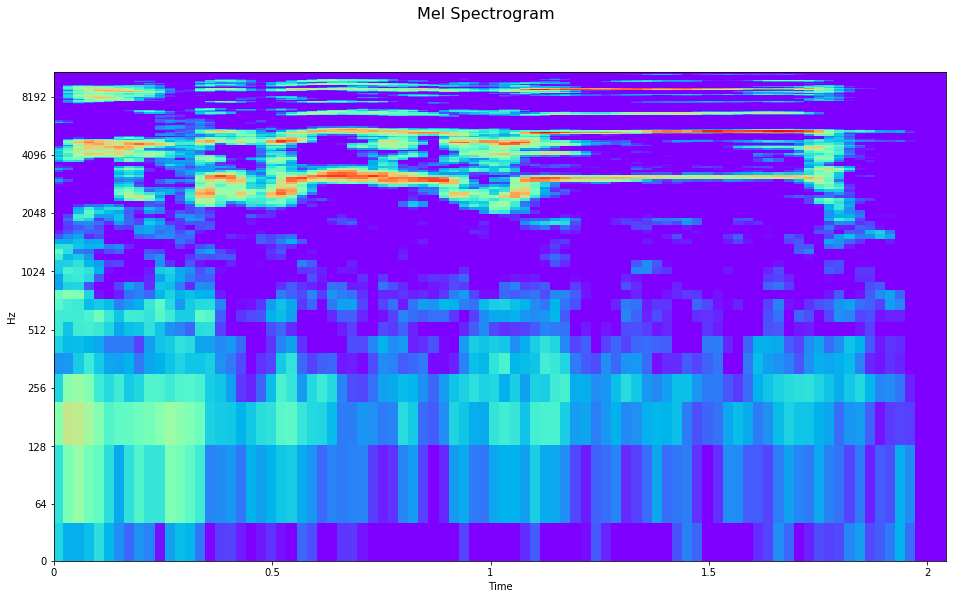

In [24]:
S_audio_task2 = librosa.feature.melspectrogram(audio_task2, sr= sr_list[j])
S_DB_audio_task2 = librosa.amplitude_to_db(S_audio_task2, ref = np.max)

# == PLOT ==

fig, ax = plt.subplots(1, 1, figsize = (16, 9))
fig.suptitle('Mel Spectrogram', fontsize = 16)

librosa.display.specshow(S_DB_audio_task2, sr = sr_list[j], hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'rainbow')



In [25]:
S_DB_audio_task.shape

(128, 126)

In [26]:
S_DB_audio_task2.shape

(128, 88)

In [103]:
D_audio_task2.shape

(1025, 88)

In [95]:
arr = np.sum(S_DB_audio_task[:,(0):(0 + window)] * S_DB_audio_task2, axis=1)

In [96]:
new_arr = arr[:, np.newaxis]

In [97]:
new_2nd_arr = np.append(new_arr, new_arr, axis=1)

In [94]:
new_2nd_arr.shape

(128, 2)

In [104]:
a = np.zeros((D_audio_task2.shape[0],1))
a.shape

(1025, 1)

In [105]:
b= np.append(a, a, axis=1)
b.shape

(1025, 2)

In [106]:
b = np.zeros((D_audio_task2.shape[0],1))
start = D_audio_task2.shape[1]
finish = D_audio_task.shape[1]
window = D_audio_task2.shape[1]
print(start, finish, window)

for step in range(start,  finish ):
    sum_arr = np.sum(D_audio_task[:,(step - start):(step - start + window)] * D_audio_task2, axis=1)
    sum_arr2 = sum_arr[:, np.newaxis]
    a = np.append(a,sum_arr2 , axis=1)

88 126 88


In [107]:
a.shape

(1025, 39)

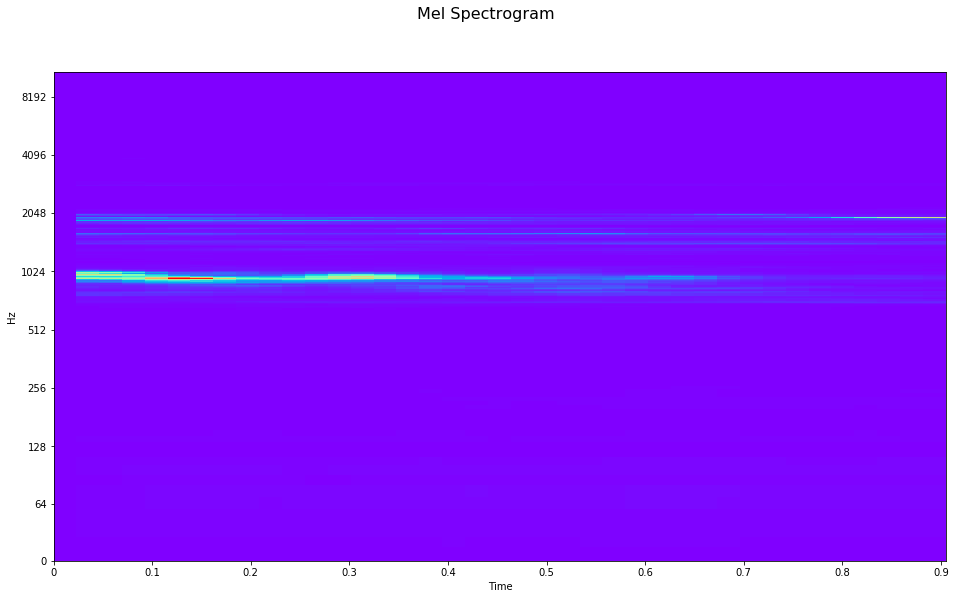

In [108]:
# == PLOT ==

fig, ax = plt.subplots(1, 1, figsize = (16, 9))
fig.suptitle('Mel Spectrogram', fontsize = 16)

librosa.display.specshow(a, sr = sr_list[j], hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'rainbow')



In [109]:
rooster_file = "rooster_competition.wav"

In [112]:
y, sr = librosa.load(rooster_file)
print("y:", y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate(KHz):', sr, '\n')

y: [ 6.36053598e-03  9.77700204e-03  1.16003444e-04 ... -1.20380938e-01
 -1.57652721e-01  0.00000000e+00] 

y shape: (3354625,) 

Sample Rate(KHz): 22050 



In [113]:
audio_task, _ = librosa.effects.trim(y)


In [114]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D_audio_task = np.abs(librosa.stft(audio_task, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D_audio_task))


Shape of D object: (1025, 6553)


In [116]:
b = np.zeros((D_audio_task2.shape[0],1))
start = a.shape[1]
finish = D_audio_task.shape[1]
window = a.shape[1]
print(start, finish, window)

for step in range(start,  finish ):
    sum_arr = np.sum(D_audio_task[:,(step - start):(step - start + window)] * a, axis=1)
    sum_arr2 = sum_arr[:, np.newaxis]
    b = np.append(b,sum_arr2 , axis=1)

39 6553 39


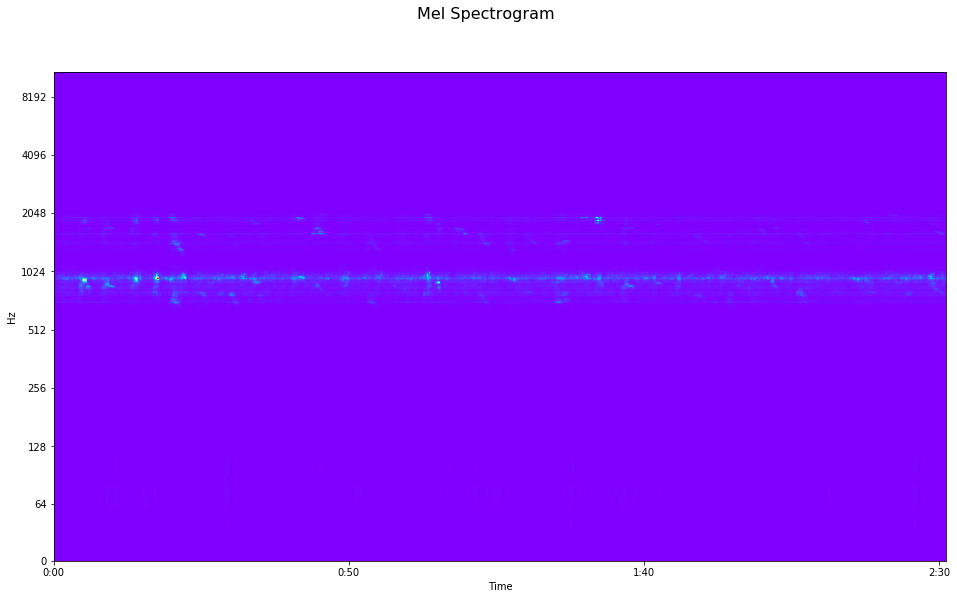

In [117]:
# == PLOT ==

fig, ax = plt.subplots(1, 1, figsize = (16, 9))
fig.suptitle('Mel Spectrogram', fontsize = 16)

librosa.display.specshow(b, sr = sr_list[j], hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'rainbow')



In [121]:
arr_max=np.max(b)
print(arr_max)

2160963.8575183926


In [122]:
arr_mean = np.mean(b)
print(arr_mean)

4150.750167716055


In [123]:
arr_std = np.std(b)
print(arr_std)

21526.617083439414


In [124]:
D_mask = b >= (arr_mean + arr_std)

print(D_mask.shape)

(1025, 6515)


In [125]:
D_new = D_mask * b
#D_new = D_audio_task.copy()
#D_new[:-1000] = 0

In [146]:
grad_b = np.gradient(D_new, axis=1)

In [147]:
grad_b.shape

(1025, 6515)

In [157]:
np.max(grad_b)

253708.75448548875

In [153]:
grad_mean=np.mean(grad_b)

In [154]:
grad_std=np.std(grad_b)

In [169]:
grad_mask = grad_b >= 20000


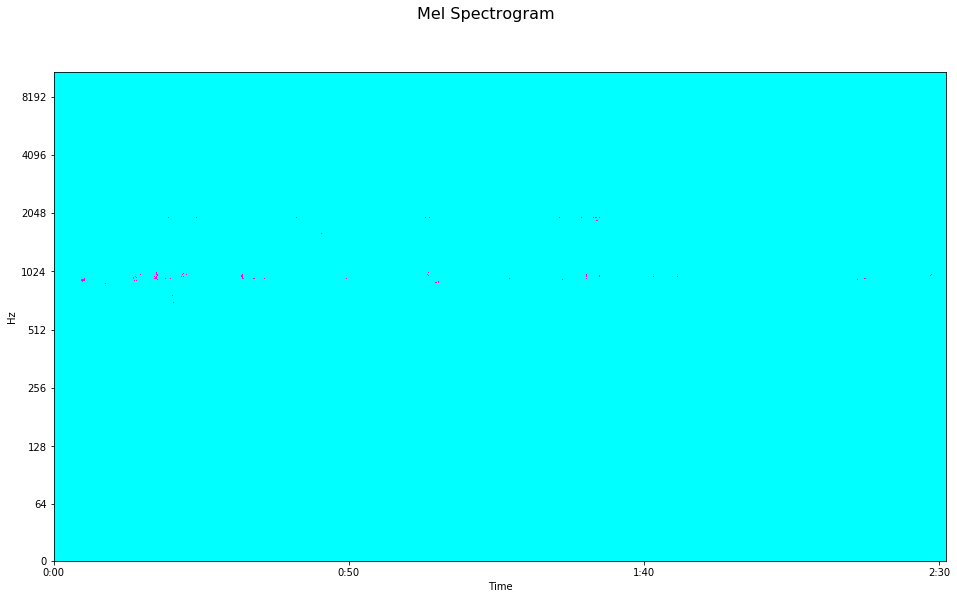

In [167]:
# == PLOT ==

fig, ax = plt.subplots(1, 1, figsize = (16, 9))
fig.suptitle('Mel Spectrogram', fontsize = 16)

librosa.display.specshow(grad_mask, sr = sr_list[j], hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')


In [ ]:
np.max(D_new)

In [ ]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.

DB_audio_task = librosa.amplitude_to_db(D_new, ref = np.max)

# ==PLOT==

fig, ax = plt.subplots(1,1, figsize = (16, 9))
fig.suptitle('Spectogram', fontsize = 16)

librosa.display.specshow(DB_audio_task, sr= sr, hop_length=hop_length, x_axis='time', y_axis= 'log', cmap='cool')

In [ ]:
new_audio_task = np.abs(librosa.istft(D_new, hop_length = hop_length))


In [ ]:
ipd.Audio(new_audio_task, rate = sr_list[i])

In [ ]:
S_audio_task = librosa.feature.melspectrogram(audio_task, sr= sr)
S_DB_audio_task = librosa.amplitude_to_db(S_audio_task, ref = np.max)

# == PLOT ==

fig, ax = plt.subplots(1, 1, figsize = (16, 9))
fig.suptitle('Mel Spectrogram', fontsize = 16)

librosa.display.specshow(S_DB_audio_task, sr = sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log', cmap = 'rainbow')


In [ ]:
# Total zero_crossings
zero_audio_task = librosa.zero_crossings(audio_task, pad=False)

print("Change rate is {:,}".format(sum(zero_audio_task)))

In [ ]:
y_harmonic_audio_task , y_percept_audio_task = librosa.effects.hpss(audio_task)

plt.figure(figsize = (16,6))

plt.plot(y_percept_audio_task, color = '#FFB100')
plt.plot(y_harmonic_audio_task, color = '#A300F9')
plt.legend(("Perceptrual", "Harmonics"))
plt.title("Harmonics and Perceptrual : Rooster Challenge", fontsize=16)